In [ ]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio
import pickle
from sklearn.utils import resample

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [ ]:
# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
# Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Feature Extraction
from sklearn.feature_selection import RFE

In [ ]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

In [ ]:
# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
warnings.filterwarnings('ignore')


In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"


In [ ]:
#Analyze data
def explore_data(df):
    print("Jumlah Instances and Attributes:", df.shape)
    print('\n')
    print('Kolom Dataset:',df.columns)
    print('\n')
    print('Data types tiap kolom: ', df.info())

In [ ]:
#Checking for duplicates
def checking_removing_duplicates(df):
    count_duplikasi = df.duplicated().sum()
    print("Jumlah duplikasi: ", count_duplikasi)
    if count_duplikasi >= 1:
        df.drop_duplicates(inplace=True)
        print('Duplicate values telah dihapus!')
    else:
        print('Tidak ada duplicate values')

In [ ]:
# Split Data to Training and Validation set
def read_in_and_split_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [ ]:
#Spot-Check Algorithms
def GetModel():
    Models = []
    Models.append(('LR'   , LogisticRegression()))
    Models.append(('LDA'  , LinearDiscriminantAnalysis()))
    Models.append(('KNN'  , KNeighborsClassifier()))
    Models.append(('CART' , DecisionTreeClassifier()))
    Models.append(('NB'   , GaussianNB()))
    Models.append(('SVM'  , SVC(probability=True)))
    return Models

In [ ]:
def ensemblemodels():
    ensembles = []
    ensembles.append(('AB'   , AdaBoostClassifier()))
    ensembles.append(('GBM'  , GradientBoostingClassifier()))
    ensembles.append(('RF'   , RandomForestClassifier()))
    ensembles.append(( 'Bagging' , BaggingClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    return ensembles

In [ ]:
# Spot-Check Normalized Models
def NormalizedModel(namaScaler):

    if namaScaler == 'standard':
        scaler = StandardScaler()
    elif namaScaler =='minmax':
        scaler = MinMaxScaler()
    elif namaScaler == 'normalizer':
        scaler = Normalizer()
    elif namaScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((namaScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((namaScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((namaScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((namaScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((namaScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((namaScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((namaScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((namaScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((namaScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((namaScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))

    return pipelines

In [ ]:
# Train Model
def fit_model(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return names, results

In [ ]:
#  Save Trained Model
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Performance Measure
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_Rekomendasi_Tanaman.csv')

# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Split Data to Training and Validation set
target ='Label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)

Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.3%


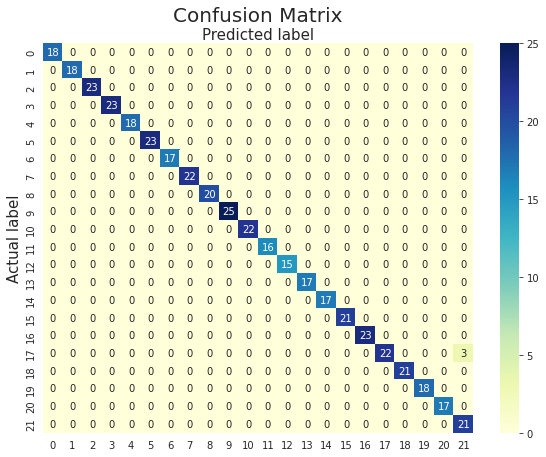

                     precision    recall  f1-score   support

             anggur       1.00      1.00      1.00        18
               apel       1.00      1.00      1.00        18
             buncis       1.00      1.00      1.00        23
             delima       1.00      1.00      1.00        23
             jagung       1.00      1.00      1.00        18
              jeruk       1.00      1.00      1.00        23
       kacang hijau       1.00      1.00      1.00        17
kacang lentil hitam       1.00      1.00      1.00        22
       kacang merah       1.00      1.00      1.00        20
     kacang ngengat       1.00      1.00      1.00        25
      kacang polong       1.00      1.00      1.00        22
              kapas       1.00      1.00      1.00        16
             kelapa       1.00      1.00      1.00        15
               kopi       1.00      1.00      1.00        17
             lentil       1.00      1.00      1.00        17
             mangga    

In [ ]:
# Train model
pipeline = make_pipeline(StandardScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import os

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

ValueError: ignored

In [ ]:
# save model
save_model(model, 'model.pkl')